In [2]:
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss

from sklearn.linear_model import LogisticRegression

In [3]:
def generate_cf(validation_labels, predictions):
    # Confusion Matrice

    # Obtain the confusion matrix
    cm = confusion_matrix(validation_labels, predictions)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['bedroom', 'classroom', 'dining', 'living', 'kitchen'], yticklabels=['bedroom', 'classroom', 'dining', 'living', 'kitchen'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [4]:
def generate_prf1(validation_labels, predictions):

    # Precision

    precision_per_class = precision_score(validation_labels, predictions, average=None)

    # for i, precision in enumerate(precision_per_class):
    #     print(f'Precision for Class {i}: {precision:.4f}')

    # Recall Score

    recall_per_class = recall_score(validation_labels, predictions, average=None)

    # Print recall for each class
    # for i, recall in enumerate(recall_per_class):
    #     print(f'Recall (Sensitivity) for Class {i}: {recall:.4f}')

    f1_per_class = f1_score(validation_labels, predictions, average=None)


    # for i, f1 in enumerate(f1_per_class):
    #     print(f'F1 Score for Class {i}: {f1:.4f}')

    for i, (precision, recall, f1) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
        print(f'Class {i}: Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}')


In [5]:
with open('source/training_BoW_representation.json', 'r') as file:
    training_data = json.load(file)

with open('source/validation_representation.json', 'r') as file:
    validation_data = json.load(file)

with open('source/vocab.json', 'r') as file:
    vocab = json.load(file)

with open('source/ground_truth.csv', 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    csvfile = list(csv_reader)

In [6]:
# Converting ground truth csv to list

ground_truth = []

for ele in csvfile:
    ground_truth.append("".join(ele))

with open('source/validation_labels.csv', 'r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    csvfile = list(csv_reader)


# Converting validation labels csv to list
validation_labels = []

for ele in csvfile:
    validation_labels.append(ele)

validation_labels = validation_labels[0]

In [7]:
X_train = training_data
X_validation = validation_data

classifier_lr = LogisticRegression(max_iter=1000)
classifier_lr.fit(X_train, ground_truth)

predictions = classifier_lr.predict(X_validation)
accuracy = accuracy_score(validation_labels, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 82.80%


Class 0: Precision=0.9228, Recall=0.8367, F1 Score=0.8776
Class 1: Precision=0.9129, Recall=0.8733, F1 Score=0.8927
Class 2: Precision=0.7880, Recall=0.7433, F1 Score=0.7650
Class 3: Precision=0.7326, Recall=0.8767, F1 Score=0.7982
Class 4: Precision=0.8127, Recall=0.8100, F1 Score=0.8114


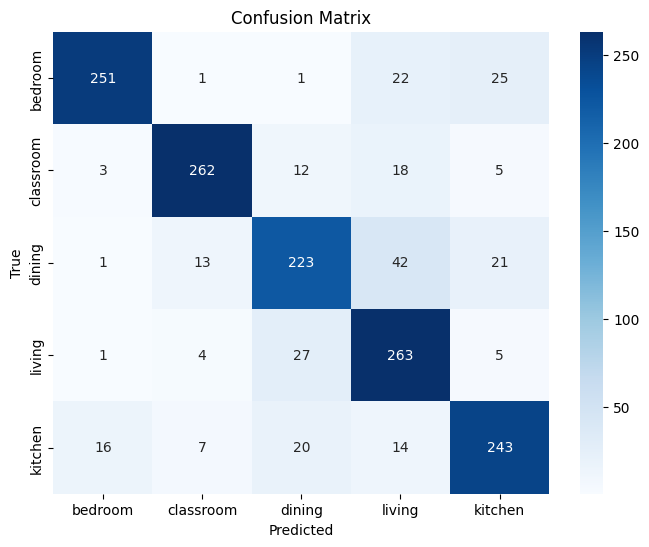

Log Loss: 0.5316


In [8]:
# Generating confusion matrice, precision, Recall, F1 Score, 
generate_prf1(validation_labels, predictions)
generate_cf(validation_labels, predictions)

# Generating Log Loss
probabilities = classifier_lr.predict_proba(X_validation)
logloss = log_loss(validation_labels, probabilities)
print(f'Log Loss: {logloss:.4f}')

In [8]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [9]:
classes = [0, 1, 2, 3, 4]

In [10]:
# Convert string labels to numeric values using a list comprehension
label_mapping = {'bedroom': 0, 'classroom': 1, 'dining': 2, 'living': 3, 'kitchen': 4}
validation_labels_numeric = [label_mapping[label] for label in validation_labels]

In [11]:
label_mapping = {'bedroom': 0, 'classroom': 1, 'dining': 2, 'living': 3, 'kitchen': 4}
ground_truth_numeric = [label_mapping[label] for label in ground_truth]

In [13]:
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
classifier.fit(X_train, label_binarize(ground_truth_numeric, classes=classes))

predictions = classifier.predict(X_validation)


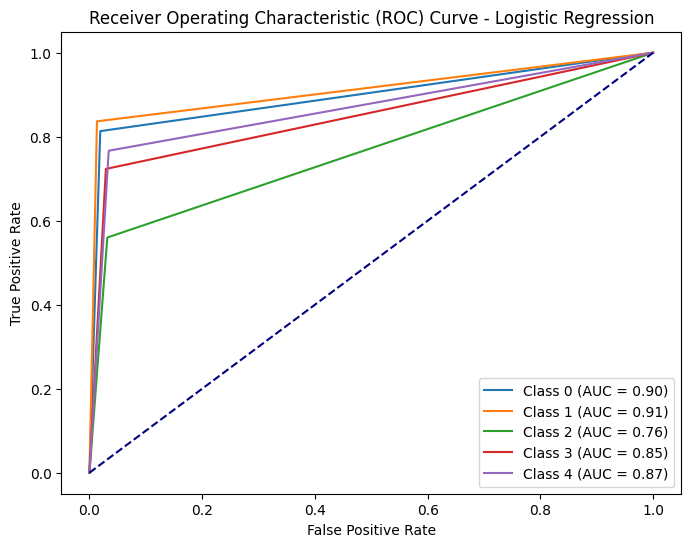

In [15]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(validation_labels_numeric, classes=classes)[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [16]:
roc_auc = roc_auc_score(label_binarize(validation_labels_numeric, classes=classes), predictions, average='macro')
print(roc_auc)

0.8572500000000002
